# SIMPLE LINEAR REGRESSION

### Objectives: 
To read data of fuel consumption and create a hypothesis model using scikit-learn.  
Test the model with test-train split method.  
Evaluate the performance using MSE(Mean Squared Error) metric.

#### IMPORTING NECESSARY PACKAGES

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

#### GET DATA AND ANALYZE

In [20]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### DATA EXPLORATION

In [9]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [19]:
#Analyzing data of few features of data set
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


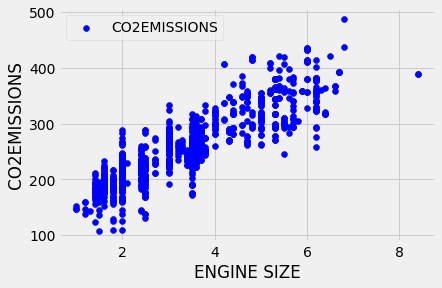

In [28]:
#Analysing CO2EMISSIONS dependency on ENGINESIZE USING A SCATTER PLOT
plt.style.use('fivethirtyeight')
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue', label='CO2EMISSIONS')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2EMISSIONS')
plt.grid(True)
plt.legend()
plt.show()

### Create Test/Train Dataset  
We split our dataset into train and test sets. Training set consists of 80% of dataset and Test set consists of 20%.  
We create a mask and select our data.

In [76]:
mark80 = int(len(df)*0.8)
train = cdf.loc[:mark80,:]
test = cdf.loc[mark80+1:,:]

### Simple Regression Model

In [77]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.asarray(train[['ENGINESIZE']])
train_y = np.asarray(train[['CO2EMISSIONS']])

regr.fit(train_x, train_y)
#Assuming hypothesis model(regr) as h_theta = theta_1*x + theta_0
print('theta_0: ', regr.coef_)
print('theta_1: ', regr.intercept_)

theta_0:  [[38.80652617]]
theta_1:  [127.10513638]


### Plot the hypothesis function

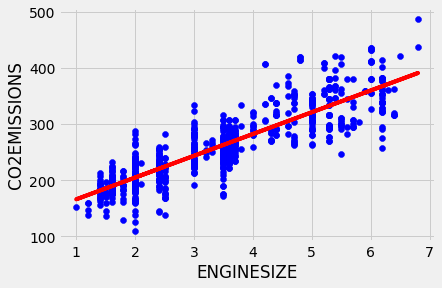

In [79]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue', label='CO2EMISSIONS')
plt.plot(train_x, regr.coef_[0]*train_x + regr.intercept_[0], color='red', label='Hypothesis')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

### Evaluating the model

In [82]:
from sklearn.metrics import r2_score
test_x = np.asarray(test[['ENGINESIZE']])
test_y = np.asarray(test[['CO2EMISSIONS']])
h_theta = regr.predict(test_x)

print('Mean Absolute Error : %.2f' % np.mean(np.absolute(h_theta - test_y)) )
print('Mean Squared Error : %.2f' %np.mean((h_theta - test_y)**2))
print('r2_score : %.2f' %r2_score(test_y, h_theta))

Mean Absolute Error : 20.59
Mean Squared Error : 747.38
r2_score : 0.79
